<a href="https://www.kaggle.com/code/stefansanchez26/basic-eda-and-interacting-map?scriptVersionId=124977344" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import folium
pd.set_option("display.max_columns", None)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/us-mass-shootings-19822023/shooting-1982-2023.csv


## Let's Take a Look at Our Data

In [2]:
shootings=pd.read_csv("/kaggle/input/us-mass-shootings-19822023/shooting-1982-2023.csv", na_values=['-'])
print(shootings.shape)
shootings.head(5)

(141, 21)


,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
0,Nashville religious school shooting,"Nashville, TN",3-27-23,"Audrey Hale, 28, who was a former student at t...",6,1,6,School,28.0,NaN,NaN,NaN,NaN,"semiautomatic rifle, semiautomatic handgun",NaN,NaN,"F (identified as transgender, per police)",NaN,NaN,Mass,2023
1,Michigan State University shooting,"East Lansing, Michigan",2-13-23,"Anthony D. McRae, 43, opened fire at Berkey Ha...",3,5,8,School,43.0,NaN,NaN,yes,NaN,semiautomatic handguns,NaN,Black,M,NaN,NaN,Mass,2023
2,Half Moon Bay spree shooting,"Half Moon Bay, California",1-23-23,"Chunli Zhao, 67, suspected of carrying out the...",7,1,8,workplace,67.0,NaN,NaN,NaN,NaN,semiautomatic handgun,NaN,Asian,M,NaN,NaN,Spree,2023
3,LA dance studio mass shooting,"Monterey Park, California",1-21-23,"Huu Can Tran, 72, fled the scene in a white va...",11,10,21,Other,72.0,yes,"According to the LA Times, ""Two law enforcemen...",NaN,NaN,semiautomatic assault weapon (Details pending),NaN,Asian,M,NaN,NaN,Mass,2023
4,Virginia Walmart shooting,"Chesapeake, Virginia",11-22-22,"Andre Bing, 31, who worked as a supervisor at ...",6,6,12,Workplace,31.0,NaN,NaN,NaN,NaN,semiautomatic handgun,NaN,Black,M,NaN,NaN,Mass,2022


In [3]:
shootings.columns

Index(['case', 'location', 'date', 'summary', 'fatalities', 'injured',
       'total_victims', 'location.1', 'age_of_shooter',
       'prior_signs_mental_health_issues', 'mental_health_details',
       'weapons_obtained_legally', 'where_obtained', 'weapon_type',
       'weapon_details', 'race', 'gender', 'latitude', 'longitude', 'type',
       'year'],
      dtype='object')

In [4]:
shootings.dtypes

case                                 object
location                             object
date                                 object
summary                              object
fatalities                            int64
injured                              object
total_victims                        object
location.1                           object
age_of_shooter                      float64
prior_signs_mental_health_issues     object
mental_health_details                object
weapons_obtained_legally             object
where_obtained                       object
weapon_type                          object
weapon_details                       object
race                                 object
gender                               object
latitude                            float64
longitude                           float64
type                                 object
year                                  int64
dtype: object

In [5]:
shootings.isna().sum()

case                                 0
location                             0
date                                 0
summary                              0
fatalities                           0
injured                              0
total_victims                        0
location.1                           0
age_of_shooter                       2
prior_signs_mental_health_issues    28
mental_health_details               42
weapons_obtained_legally            17
where_obtained                      46
weapon_type                          0
weapon_details                      26
race                                13
gender                               0
latitude                            15
longitude                           15
type                                 0
year                                 0
dtype: int64

### There is a row with victims and injured with no numerical value, we better remove it

In [6]:
shootings[shootings['total_victims'].str.contains('TK', case=False)]

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,latitude,longitude,type,year
12,Tulsa medical center shooting,"Tulsa, Oklahoma",6-1-22,"Michael Louis, 45, killed four, including two ...",4,"(TK - ""fewer than 10""",TK,workplace,45.0,NaN,NaN,yes,NaN,semiautomatic rifle; semiautomatic handgun,AR-15 style rifle,Black,M,NaN,NaN,Mass,2022


In [7]:
shootings=shootings.drop(12)

## Let's Change the Objects to Int for a Better Analysis and Plotting

In [8]:
median = shootings['age_of_shooter'].median()
shootings['age_of_shooter'] = shootings['age_of_shooter'].fillna(median).astype(int)
shootings[['injured','total_victims']] = shootings[['injured','total_victims']].astype(int)

shootings.dtypes

case                                 object
location                             object
date                                 object
summary                              object
fatalities                            int64
injured                               int64
total_victims                         int64
location.1                           object
age_of_shooter                        int64
prior_signs_mental_health_issues     object
mental_health_details                object
weapons_obtained_legally             object
where_obtained                       object
weapon_type                          object
weapon_details                       object
race                                 object
gender                               object
latitude                            float64
longitude                           float64
type                                 object
year                                  int64
dtype: object

## Plotting

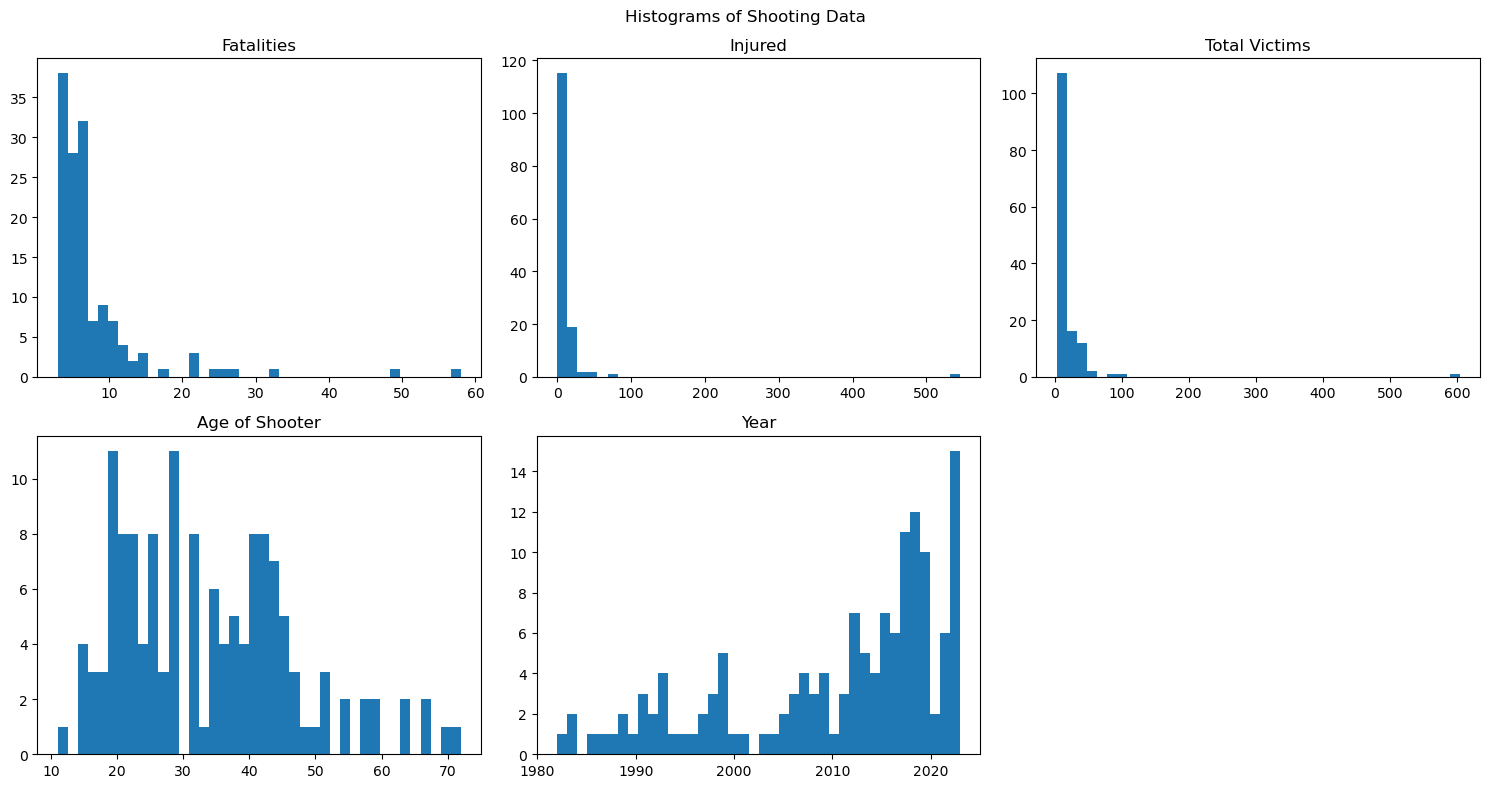

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

axs[0, 0].hist(shootings['fatalities'], bins=40)
axs[0, 0].set_title('Fatalities')
axs[0, 1].hist(shootings['injured'], bins=40)
axs[0, 1].set_title('Injured')
axs[0, 2].hist(shootings['total_victims'], bins=40)
axs[0, 2].set_title('Total Victims')
axs[1, 0].hist(shootings['age_of_shooter'], bins=40)
axs[1, 0].set_title('Age of Shooter')
axs[1, 1].hist(shootings['year'], bins=40)
axs[1, 1].set_title('Year')

axs[1, 2].set_visible(False)
fig.suptitle('Histograms of Shooting Data')
plt.tight_layout()
plt.show()

<BarContainer object of 10 artists>

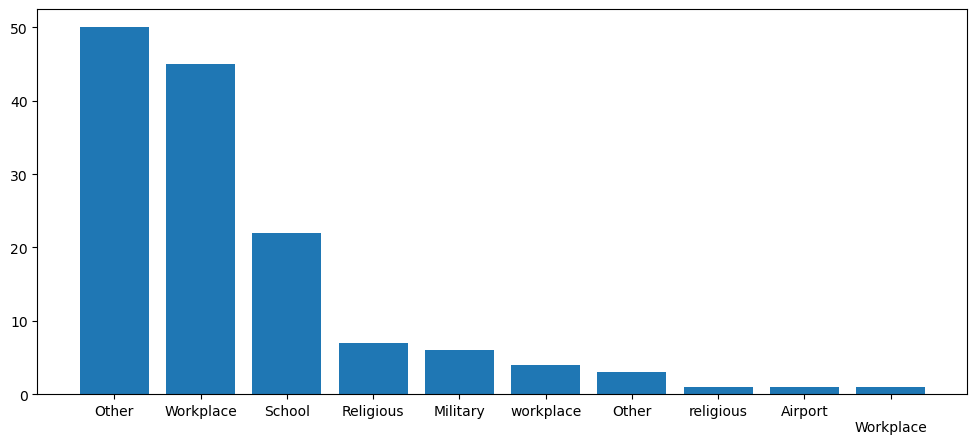

In [10]:
fig = plt.figure(figsize=(12, 5))
plt.bar(shootings['location.1'].value_counts().keys(),shootings['location.1'].value_counts())

In [11]:
shootings[['latitude','longitude']]

,latitude,longitude
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
136,28.033189,-80.642970
137,35.667201,-97.429370
138,32.552001,-117.043081
139,32.925166,-96.838676


## Interactive Map (Click in the Location of the shooting for info)

In [12]:
locations=shootings.dropna(subset=['latitude','longitude'])
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4)
for index, row in locations.iterrows():
    popup_html = "<strong>{}:</strong> {}<br><strong>{}:</strong> {}<br><strong>{}:</strong> {}<br><strong>{}:</strong> {}<br><strong>{}:</strong> {}".format("Summary", row["summary"],"Location", row["location"],"Case", row["case"], "Total Victims", row["total_victims"],"Year", row["year"])
    popup = folium.Popup(popup_html, max_width=400)
    folium.Marker([row['latitude'], row['longitude']],popup=popup).add_to(m)
m